In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         28899 non-null  int64         
 1   name               28899 non-null  object        
 2   market             28899 non-null  object        
 3   funding_total_usd  28899 non-null  int64         
 4   status             28339 non-null  object        
 5   State_code         28873 non-null  object        
 6   founded_at         23793 non-null  datetime64[ns]
 7   acquired_at        2957 non-null   datetime64[ns]
 8   price_amount       914 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 2.0+ MB


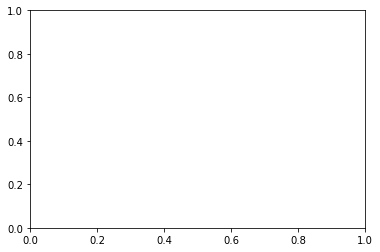

In [11]:
data = pd.read_csv('cleaned.csv')
data['acquired_at'] = pd.to_datetime(data.acquired_at, errors = 'coerce')
data['founded_at'] = pd.to_datetime(data.founded_at, errors = 'coerce')
fig, ax = plt.subplots()
data.info()

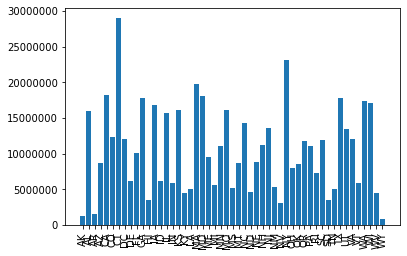

In [17]:
fig = plt.figure()
average_funding_per_state = data.groupby(by = 'State_code').funding_total_usd.mean()
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(average_funding_per_state.index,average_funding_per_state.values) 

<AxesSubplot:>

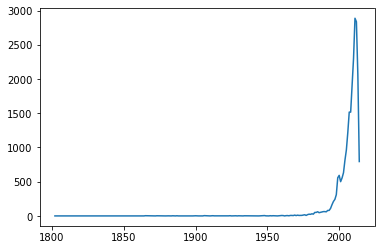

In [18]:
data.founded_at.dt.year.value_counts().sort_index().plot()

<AxesSubplot:>

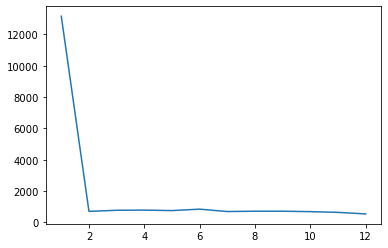

In [85]:
data.founded_at.dt.month.value_counts().sort_index().plot()

<AxesSubplot:>

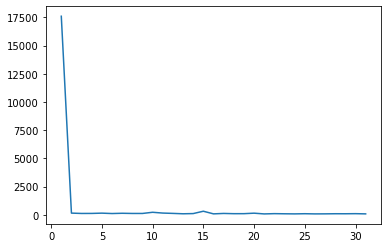

In [89]:
data.founded_at.dt.day.value_counts().sort_index().plot()

In [143]:
other_count = 0
first_count = 0
for i in range(data['founded_at'].size):
    if (data['founded_at'][i].month == 1) and (data['founded_at'][i].day == 1):
        
        first_count+= 1
    else:
        other_count+= 1
print(first_count/(first_count+other_count)) 
#percentage of companies "founded" on january first


0.5974658869395711


<AxesSubplot:xlabel='founded_at'>

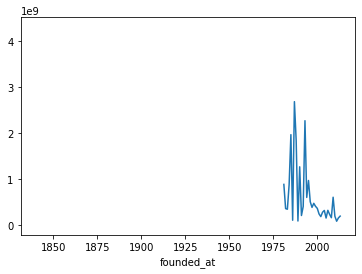

In [121]:
data.groupby(data.founded_at.dt.year).price_amount.mean().plot()

<AxesSubplot:>

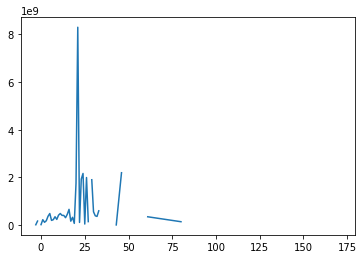

In [21]:
#best year into company to sell
data.groupby(data.acquired_at.dt.year - data.founded_at.dt.year).price_amount.mean().plot()

<AxesSubplot:xlabel='time_running'>

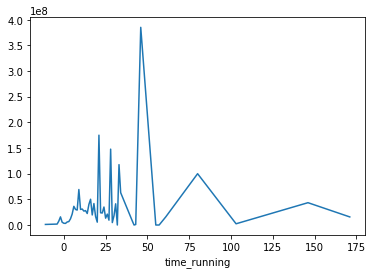

In [22]:
data['time_running'] = (data.acquired_at.dt.year - data.founded_at.dt.year)
data.groupby(data.time_running).funding_total_usd.mean().plot()
#how long does it take a company to reach the highest funding total?

<AxesSubplot:xlabel='status'>

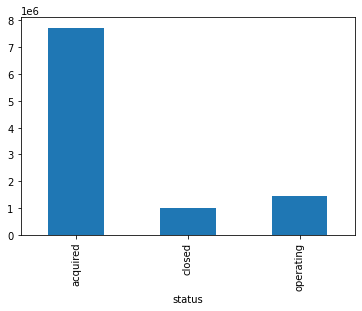

In [23]:
data.groupby(data.status).funding_total_usd.median().plot(kind = 'bar')
#why do aquired companied raise more than operating ones?

In [24]:
funding_mean = data.groupby(data.market).funding_total_usd.mean()
selling_mean = data.groupby(data.market).price_amount.mean()
time_running_mean = data.groupby(data.market).time_running.mean()
price_by_time_running_mean = data.groupby(data.market).mean()['price_amount']/data.groupby(data.market).mean()['time_running']

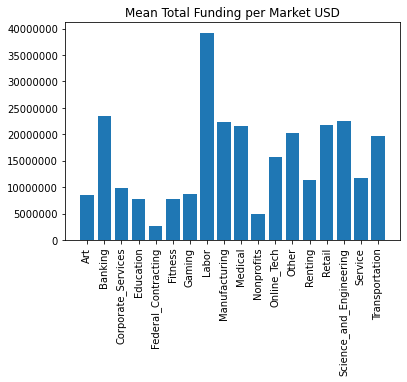

In [25]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean Total Funding per Market USD')
ax = plt.bar(funding_mean.index,funding_mean.values) 
plt.savefig('Mean_Total_Funding_per_Market_USD.png')
#average amount of funding per market

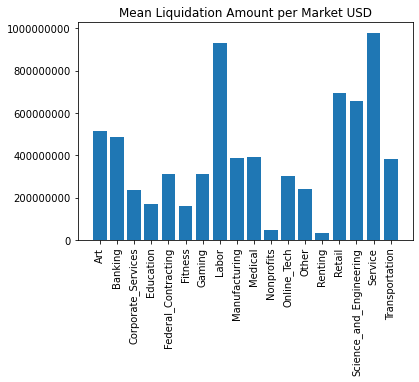

In [26]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean Liquidation Amount per Market USD')
ax = plt.bar(selling_mean.index,selling_mean.values) 
plt.savefig('graphs/Mean_Liquidation_Amount_per_Market_USD.png')
#average company sale


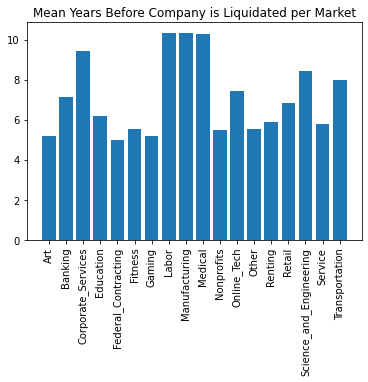

In [28]:
plt.xticks(rotation=90)
plt.title('Mean Years Before Company is Liquidated per Market')
ax = plt.bar(time_running_mean.index,time_running_mean.values)
plt.savefig('graphs/Mean_Years_Before_Company_per_Market.png')
#average company lifespan

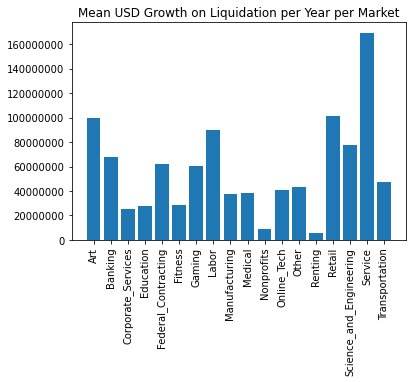

In [30]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
plt.title('Mean USD Growth on Liquidation per Year per Market')
ax = plt.bar(price_by_time_running_mean.index,price_by_time_running_mean.values) 
plt.savefig('graphs/Mean_USD_Growth_per_Year_per_Market.png')

#per year value of the company increase
# price they buy dividdd the number of years